In [3]:
"""
@author: Vaishali Oga
:: Kernel Python 3.6
        
"""
#importing required packages
import fileinput
import re
import pandas as pd
from textblob import *

import nltk

from nltk import *
import operator
import csv

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [4]:
import os
os.getcwd()
os.chdir('C:/Users/ogav/Documents/TinkerTime')


In [5]:
# Intialize an empty list to hold all of our comments
comment = []

In [6]:
# A helper function that removes all the non ASCII characters
# from the given string. Retuns a string with only ASCII characters.
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

In [8]:
# LOAD AND CLEAN DATA

# Load in the input file and process each row at a time.
# We assume that the file has 1 column:
# 1. The comment text.

#
# We create a data structure for each comment:
#

# orig:     The original, unpreprocessed string of characters
# clean:    The preprocessed string of characters
# TextBlob: The TextBlob object, created from the 'clean' string


    
 
import codecs
with codecs.open('Comments.csv',) as csvfile:
#with open('Comments.csv','rb') as csvfile:
    reade = csv.reader(csvfile, delimiter=',')
    next(reade)
    for row in reade:
        comments= dict()
        comments['Comment'] = row[0]
        
        #comments['created'] = int(row[1])


        comments['clean'] = comments['Comment']

        # Remove all non-ascii characters
        comments['clean'] = strip_non_ascii(comments['clean'])

        # Normalize case
        comments['clean'] = comments['clean'].lower()

        # Remove URLS
        comments['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', comments['clean'])
        # Fix internet lingo
        comments['clean'] = re.sub(r'\bthats\b', 'that is', comments['clean'])
        comments['clean'] = re.sub(r'\bive\b', 'i have', comments['clean'])
        comments['clean'] = re.sub(r'\bim\b', 'i am', comments['clean'])
        comments['clean'] = re.sub(r'\bya\b', 'yeah', comments['clean'])
        comments['clean'] = re.sub(r'\bcant\b', 'can not', comments['clean'])
        comments['clean'] = re.sub(r'\bwont\b', 'will not', comments['clean'])
        comments['clean'] = re.sub(r'\bid\b', 'i would', comments['clean'])
        comments['clean'] = re.sub(r'wtf', 'what the fuck', comments['clean'])
        comments['clean'] = re.sub(r'\bwth\b', 'what the hell', comments['clean'])
        comments['clean'] = re.sub(r'\br\b', 'are', comments['clean'])
        comments['clean'] = re.sub(r'\bu\b', 'you', comments['clean'])
        comments['clean'] = re.sub(r'\bk\b', 'OK', comments['clean'])
        comments['clean'] = re.sub(r'\bsux\b', 'sucks', comments['clean'])
        comments['clean'] = re.sub(r'\bno+\b', 'no', comments['clean'])
        comments['clean'] = re.sub(r'\bcoo+\b', 'cool', comments['clean'])

       
        # Create textblob object
        comments['TextBlob'] = TextBlob(comments['clean'])

        # Correct spelling (SLOW)
        #comments['TextBlob'] = comments['TextBlob'].correct()

        #comments.append(comments)# LOAD AND CLEAN DATA
        comment.append(comments)
        

In [9]:
# DEVELOP MODELS

for comments in comment:
    comments['polarity'] = float(comments['TextBlob'].sentiment.polarity)
    comments['subjectivity'] = float(comments['TextBlob'].sentiment.subjectivity)

    if comments['polarity'] >= 0.1:
        comments['sentiment'] = 'positive'
    elif comments['polarity'] <= -0.1:
        comments['sentiment'] = 'negative'
    else:
        comments['sentiment'] = 'neutral'

comment_sorted = sorted(comment, key=lambda k: k['polarity'])

In [10]:
# EVALUATE RESULTS
#WE will also print comments

negative_comment = [d for d in comment_sorted if d['sentiment'] == 'negative']
for comments in negative_comment[0:100]:
    print("clean=%s"%(comments['clean']))
print("\n \n \n end of negative comments \n \n \n") 
positive_comment = [d for d in comment_sorted if d['sentiment'] == 'positive']
for comments in positive_comment[0:100]:
    print("clean=%s"%(comments['clean']))
print("\n \n \n end of positive comments \n \n \n") 
neutral_comment = [d for d in comment_sorted if d['sentiment'] == 'neutral']
for comments in neutral_comment[0:100]:
    print("clean=%s"%(comments['clean']))
print("\n \n \n end of neutral comments \n \n \n")

clean=terrible.  contacting owners
clean=worst order ever from dominos
clean=worst service ever
clean=terrrbile
clean=thank you for delivering on easter! me and my employees are very greatful  scott and robert have risin indeed
clean=my pizza was terrible :
clean=lava cakes were the worst yesterdaylike they were ran over by a steamroller not even cooked you guys need to start learning how to do job
clean=it said that the order will take max 23 mins...ot came after one hour....i ordered a side bbq sauce and it didnt come with the order!!!!!!.....the worst experience ever
clean=you suck! worst delivery service! pizza didn't leave store until it was sitting there for 40 minutes!!!! refund my money!!!!!!!!!
clean=i would like to know why my pizza had to sit at the store for 1hour before it was delivered !!!!!!????? pizza was horrible !! cold as ice !!!   can someone contact me please !!!!!!!!!!!!!!
clean=ordering online was terrible i ordered a delivery they told me  they dont deliver to m

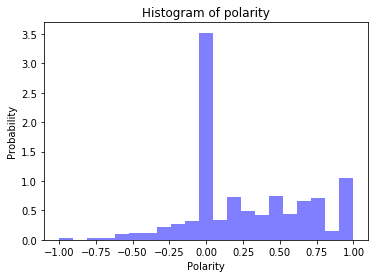

In [11]:

# plots

# A histogram of the scores.
x = [d['polarity'] for d in comment_sorted]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

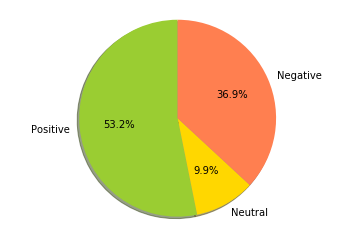

In [12]:
# A pie chart showing the number of comments in each sentiment category

pos = len(positive_comment)
neu = len(negative_comment)
neg = len(neutral_comment)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'coral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [16]:
# printing  5 positive  
print("\n\nPositive comments:")
for comments in positive_comment[90:95]: 
    print(comments['clean']) 
  



Positive comments:
absolutely mouth watering...and such a deal...50% of the pizza, lovin' it!!!
wow
wow your great...thanks catherine
always solid pizza thanks
i asked for no green pepper on my sandwich but there was gp on it


In [17]:
# printing  5 negative  
print("\n\nNegative comments:")
for comments in negative_comment[90:95]: 
    print(comments['clean']) 



Negative comments:
pizza taste horrible
dante was late!!!!!!
my pizza looks nasty
food took forever said i had the food and was still waiting on my food terrible service
that was horrible. the edges of the pizza were burnt and there was no sauce. i also paid for icing and didnt receive it.


In [32]:
# printing  5 neutral
print("\n\nNeutral comments:")
for comments in neutral_comment[80:95]: 
    print(comments['clean']) 



Neutral comments:
jamal was very polite, but was assigned another order at the same time that made delivery take almost an hour.  the pizza and the chicken look like they were well made, but were barely warm when they arrived.i was worried something bad had happened to the
i have to say that i love your food but the location were it was picked up sucks it needs an update bad which i belive may be coming soon because it still has the old name domino's pizza instead of just domino's
i asked for square cut  the chicken was cut in huge chunks...nothing like i have received ever from the redford location.  will never order from this location again.
order accurate. delivery punctual. however, specialty chicken saltier than would've prefered.
i normally order pretty often but this experience is leaving a bad taste in my mouth and my order hasn't even arrived yet even though the tracking says it has. i called to question where my delivery was at and the girl just tried to rush me off the pho

In [19]:
TextBlob("awesome pizza").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [20]:
TextBlob("terrible pizza").sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [21]:
TextBlob("late delivery").sentiment

Sentiment(polarity=-0.3, subjectivity=0.6)

In [22]:
TextBlob("not bad").sentiment

Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)

In [24]:
TextBlob("horrible pizza and late delivery").sentiment

Sentiment(polarity=-0.65, subjectivity=0.8)

In [29]:
TextBlob("very great").sentiment

Sentiment(polarity=1.0, subjectivity=0.9750000000000001)

In [28]:
TextBlob("great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [31]:
TextBlob("sucks").sentiment

Sentiment(polarity=-0.3, subjectivity=0.3)